In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import csv
import requests
import datetime
import dateutil
import json
from pandas.io.json import json_normalize
pd.options.mode.chained_assignment = None

In [2]:
#************PLEASE IGNORE THIS CELL*********************#


# setting the date
# ****remember to change the date Accordingly*****#
# date format = Year, month, day
# start = '2020-02-02'
# end = '2020-02-29'

# getting the data from the url
# url = "https://data.wprdc.org/api/3/action/datastore_search_sql?sql=SELECT%20census_date,%20record_id,%20race,%20gender,%20age_at_census%20from%20%2266cdcd57-6c92-4aaa-8800-0ed9d8f03e22%22%20WHERE%20census_date%20BETWEEN%20%27" + start +"%27%20AND%20%27" + end +"%27"
# response = requests.get(url)

#read the data
# data = response.text

# parsing the data -- converting to Json
# so as can read as a dict
# parsed = json.loads(data)

# extrating the 'record' for the month
# df = pd.json_normalize(parsed['result']['records'], errors='ignore')

# converting the date to dataframe and,
# sorting the 'date' in ascending order
# df['census_date'] = pd.to_datetime(df['census_date']).dt.date
# df = df.sort_values(by = 'census_date')
# df.reset_index(drop=True, inplace=True)

#Saving as csv file
# ****remember to change the file name accordingly.******#
# df.to_csv('febuary.csv')


In [6]:
# begin working with csv file from YOUR path
# have the file saved in the same folder as this script.
# change the name of the file to the MONTH you are ASSIGNED e.g april.csv etc.
df = pd.read_csv('janfeb.csv')

#converting to pandas datetime format
df['census_date'] = pd.to_datetime(df['census_date'])

In [10]:
#isolating saturdays

# copying the csv
by_sat = df

#filtering the race to just have black and white
by_sat = by_sat[by_sat.race.isin(['B','W'])]

#filtering by saturday
#by_sat['census_date'] = pd.date_range

by_sat['day_of_week'] = by_sat['census_date'].dt.dayofweek

#creating the days 
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

# mixing 
by_sat['day_of_week'] = by_sat['day_of_week'].apply(lambda x: days[x])

#filtering just saturdays
by_sat = by_sat.loc[(by_sat.day_of_week == 'Sat')]

#by_sat.head(2)

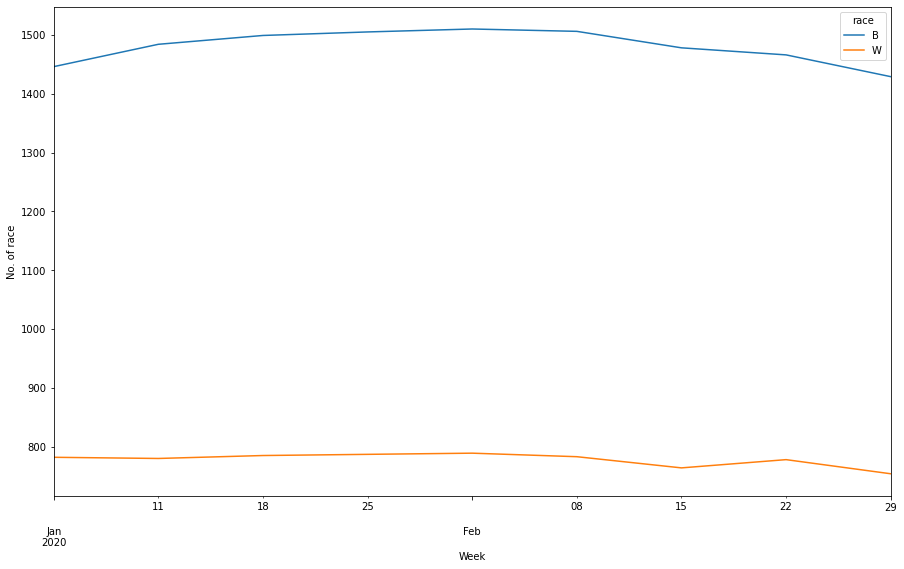

In [11]:
# graphing

fig, ax = plt.subplots(figsize=(15,9))

# using unstack() to plot
by_sat.groupby(['census_date','race'])['race'].count().unstack().plot(ax=ax)
ax.set_xlabel('Week')
ax.set_ylabel('No. of race')

plt.show()